In [6]:
from sklearn.datasets import load_files
import numpy as np
reviews_train = load_files("D:\\M.Tech\\College-M.Tech\\DS Lab\\dataset\\aclImdb_v1\\aclImdb\\train")
text_train, y_train = reviews_train.data, reviews_train.target
print("type of the text_train: {}".format(type(text_train)))
print("number of documents in text_train: {}".format(len(text_train)))
print("text_train[1]:\n{}".format(text_train[1]))

type of the text_train: <class 'list'>
number of documents in text_train: 75000
text_train[1]:
b"Amount of disappointment I am getting these days seeing movies like Partner, Jhoom Barabar and now, Heyy Babyy is gonna end my habit of seeing first day shows.<br /><br />The movie is an utter disappointment because it had the potential to become a laugh riot only if the d\xc3\xa9butant director, Sajid Khan hadn't tried too many things. Only saving grace in the movie were the last thirty minutes, which were seriously funny elsewhere the movie fails miserably. First half was desperately been tried to look funny but wasn't. Next 45 minutes were emotional and looked totally artificial and illogical.<br /><br />OK, when you are out for a movie like this you don't expect much logic but all the flaws tend to appear when you don't enjoy the movie and thats the case with Heyy Babyy. Acting is good but thats not enough to keep one interested.<br /><br />For the positives, you can take hot actresses,

In [7]:
text_train = [doc.replace(b"<br/>",b"") for doc in text_train]
print("sample per class (training:{})".format(np.bincount(y_train)))

sample per class (training:[12500 12500 50000])


In [8]:
reviews_test = load_files("D:\\M.Tech\\College-M.Tech\\DS Lab\\dataset\\aclImdb_v1\\aclImdb\\test")
text_test, y_test = reviews_test.data, reviews_test.target
print("number of documents in text_test: {}".format(len(text_test)))
print("sample per class (test:{} )".format(np.bincount(y_test)))
text_test = [doc.replace(b"<br/>",b"") for doc in text_test]

number of documents in text_test: 25000
sample per class (test:[12500 12500] )


In [9]:
bards_words = ["the fool doth think he is wise.","but the wise man knows himself to be a fool."]
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()
vect.fit(bards_words)
print("vocabulary size: {}".format(len(vect.vocabulary_)))
print("vocabulary content:\n{}".format(vect.vocabulary_))


vocabulary size: 13
vocabulary content:
{'the': 9, 'fool': 3, 'doth': 2, 'think': 10, 'he': 4, 'is': 6, 'wise': 12, 'but': 1, 'man': 8, 'knows': 7, 'himself': 5, 'to': 11, 'be': 0}


In [10]:
bag_of_words = vect.transform(bards_words)
print("type of bag_of_words: {}".format(type(bag_of_words)))

type of bag_of_words: <class 'scipy.sparse._csr.csr_matrix'>


In [11]:
print("Density of bag_of_words: {}".format(bag_of_words.toarray()))

Density of bag_of_words: [[0 0 1 1 1 0 1 0 0 1 1 0 1]
 [1 1 0 1 0 1 0 1 1 1 0 1 1]]


In [12]:
vect = CountVectorizer().fit(text_train)
X_train = vect.transform(text_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 10359806 stored elements and shape (75000, 124255)>


In [13]:
feature_names = vect.get_feature_names_out()
print("number of features: {}".format(len(feature_names)))
print("first 20 features:\n{}".format(feature_names[:20]))
print("feature 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 2000th feature:\n{}".format(feature_names[::2000]))

number of features: 124255
first 20 features:
['00' '000' '0000' '0000000000000000000000000000000001' '0000000000001'
 '000000001' '000000003' '00000001' '000001745' '00001' '0001' '00015'
 '0002' '0007' '00083' '000ft' '000s' '000th' '001' '002']
feature 20010 to 20030:
['cheapen' 'cheapened' 'cheapening' 'cheapens' 'cheaper' 'cheapest'
 'cheapie' 'cheapies' 'cheapjack' 'cheaply' 'cheapness' 'cheapo'
 'cheapozoid' 'cheapquels' 'cheapskate' 'cheapskates' 'cheapy' 'chearator'
 'cheat' 'cheata']
Every 2000th feature:
['00' '_require_' 'aideed' 'announcement' 'asteroid' 'banquière'
 'besieged' 'bollwood' 'btvs' 'carboni' 'chcialbym' 'clotheth'
 'consecration' 'cringeful' 'deadness' 'devagan' 'doberman' 'duvall'
 'endocrine' 'existent' 'fetiches' 'formatted' 'garard' 'godlie' 'gumshoe'
 'heathen' 'honoré' 'immatured' 'interested' 'jewelry' 'kerchner' 'köln'
 'leydon' 'lulu' 'mardjono' 'meistersinger' 'misspells' 'mumblecore'
 'ngah' 'oedpius' 'overwhelmingly' 'penned' 'pleading' 'previlage

In [14]:
# Cross-validation with LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scores = cross_val_score(LogisticRegression(max_iter=1000), X_train, y_train, cv=5)
print("Mean cross-validation accuracy: {:.2f}".format(np.mean(scores)))

c:\Users\NZXT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\NZXT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Mean cross-validation accuracy: 0.70


c:\Users\NZXT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
# Grid search to tune the regularization parameter C
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10]}
grid = GridSearchCV(LogisticRegression(max_iter=2000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))
print("Best parameters: ", grid.best_params_)

c:\Users\NZXT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\NZXT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Best cross-validation score: 0.71
Best parameters:  {'C': 0.1}


In [16]:
# Using min_df to reduce the number of features
vect = CountVectorizer(min_df=5).fit(text_train)
X_train = vect.transform(text_train)
print("X_train with min_df: {}".format(repr(X_train)))

X_train with min_df: <Compressed Sparse Row sparse matrix of dtype 'int64'
	with 10235504 stored elements and shape (75000, 44532)>


In [17]:
# Look at features after applying min_df
feature_names = vect.get_feature_names_out()
print("First 50 features:\n{}".format(feature_names[:50]))
print("Features 20010 to 20030:\n{}".format(feature_names[20010:20030]))
print("Every 700th feature:\n{}".format(feature_names[::700]))

First 50 features:
['00' '000' '001' '007' '00am' '00pm' '00s' '01' '02' '03' '04' '05' '06'
 '07' '08' '09' '10' '100' '1000' '1001' '100k' '100th' '100x' '101'
 '101st' '102' '103' '104' '105' '106' '107' '108' '109' '10am' '10pm'
 '10s' '10th' '10x' '11' '110' '1100' '110th' '111' '112' '1138' '115'
 '116' '117' '11pm' '11th']
Features 20010 to 20030:
['inert' 'inertia' 'inescapable' 'inescapably' 'inevitability'
 'inevitable' 'inevitably' 'inexcusable' 'inexcusably' 'inexhaustible'
 'inexistent' 'inexorable' 'inexorably' 'inexpensive' 'inexperience'
 'inexperienced' 'inexplicable' 'inexplicably' 'inexpressive'
 'inextricably']
Every 700th feature:
['00' 'accountability' 'alienate' 'appetite' 'austen' 'battleground'
 'bitten' 'bowel' 'burton' 'cat' 'choreographing' 'collide' 'constipation'
 'creatively' 'dashes' 'descended' 'dishing' 'dramatist' 'ejaculation'
 'epitomize' 'extinguished' 'figment' 'forgot' 'garnished' 'goofy' 'gw'
 'hedy' 'hormones' 'imperfect' 'insomniac' 'janitoria

In [18]:
# Grid search with min_df
grid = GridSearchCV(LogisticRegression(max_iter=2000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

c:\Users\NZXT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\NZXT\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

Best cross-validation score: 0.71


In [19]:
# Working with English stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
print("Number of stop words: {}".format(len(ENGLISH_STOP_WORDS)))
print("Every 10th stopword:\n{}".format(list(ENGLISH_STOP_WORDS)[::10]))

Number of stop words: 318
Every 10th stopword:
['seeming', 'up', 'over', 'even', 'indeed', 'themselves', 'others', 'which', 'moreover', 'whenever', 'ten', 'mostly', 'thereafter', 'put', 'of', 'becomes', 'besides', 'else', 'am', 'anyhow', 'these', 'since', 'due', 'neither', 'because', 'ever', 'itself', 'some', 'co', 'too', 'has', 'fire']


In [20]:
# Using CountVectorizer with stopwords
vect = CountVectorizer(min_df=5, stop_words="english").fit(text_train)
X_train = vect.transform(text_train)
print("X_train with stop words:\n{}".format(repr(X_train)))

X_train with stop words:
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 6621682 stored elements and shape (75000, 44223)>


In [21]:
# Grid search with stopwords
grid = GridSearchCV(LogisticRegression(max_iter=2000), param_grid, cv=5)
grid.fit(X_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.71


In [22]:
# Using TF-IDF with pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None),
                     LogisticRegression(max_iter=2000))
param_grid = {'logisticregression__C': [0.001, 0.01, 0.1, 1, 10]}

grid = GridSearchCV(pipe, param_grid, cv=5)
grid.fit(text_train, y_train)
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best cross-validation score: 0.72


In [23]:
# Analyzing TF-IDF features - extracting vectorizer and analyzing important words
vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]

# Transform the training dataset
X_train = vectorizer.transform(text_train)

# Find maximum value for each of the features over the dataset
max_value = X_train.max(axis=0).toarray().ravel()
sorted_by_tfidf = max_value.argsort()

# Get feature names
feature_names = np.array(vectorizer.get_feature_names_out())

print("Features with lowest tfidf:\n{}".format(
    feature_names[sorted_by_tfidf[:20]]))
print("Features with highest tfidf: \n{}".format(
    feature_names[sorted_by_tfidf[-20:]]))

Features with lowest tfidf:
['remained' 'acclaimed' 'combines' 'rapidly' 'uniformly' 'diverse'
 'avoiding' 'fills' 'admired' 'feeble' 'wherever' 'admission' 'starters'
 'abound' 'assure' 'pivotal' 'deliciously' 'comprehend' 'strung'
 'inadvertently']
Features with highest tfidf: 
['nukie' 'reno' 'dominick' 'taz' 'ling' 'rob' 'victoria' 'turtles'
 'khouri' 'lorenzo' 'id' 'zizek' 'elwood' 'nikita' 'rishi' 'timon'
 'titanic' 'zohan' 'pammy' 'godzilla']


In [24]:
# Analyzing words with low inverse document frequency
sorted_by_idf = np.argsort(vectorizer.idf_)
print("Features with lowest idf:\n{}".format(
    feature_names[sorted_by_idf[:100]]))

Features with lowest idf:
['the' 'and' 'of' 'to' 'this' 'is' 'it' 'in' 'that' 'but' 'for' 'with'
 'was' 'as' 'on' 'movie' 'not' 'br' 'one' 'be' 'have' 'are' 'film' 'you'
 'all' 'at' 'an' 'by' 'from' 'so' 'like' 'who' 'there' 'they' 'his' 'if'
 'out' 'just' 'about' 'he' 'or' 'has' 'what' 'some' 'can' 'good' 'when'
 'more' 'up' 'time' 'very' 'even' 'only' 'no' 'see' 'would' 'my' 'story'
 'really' 'which' 'well' 'had' 'me' 'than' 'their' 'much' 'were' 'get'
 'other' 'do' 'been' 'most' 'also' 'into' 'don' 'her' 'first' 'great'
 'how' 'made' 'people' 'will' 'make' 'because' 'way' 'could' 'bad' 'we'
 'after' 'them' 'too' 'any' 'then' 'movies' 'watch' 'she' 'think' 'seen'
 'acting' 'its']


Coefficient shape: (3, 44532)
Flattened coefficient shape: (44532,)


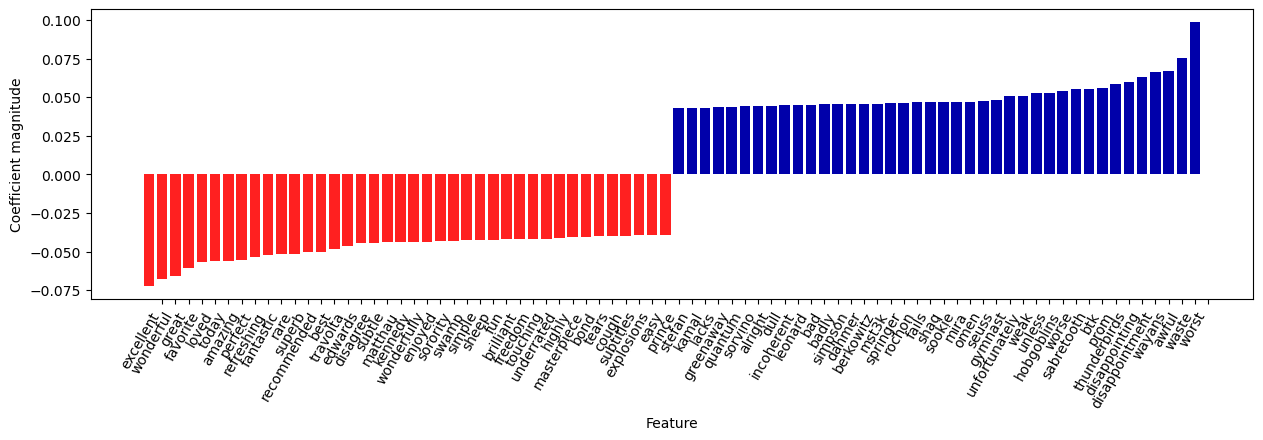

In [27]:
# Visualizing model coefficients
# First, let's install mglearn if not available and create a simple visualization

try:
    import mglearn
    # Get the correct feature names from the trained model's vectorizer
    vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
    feature_names = vectorizer.get_feature_names_out()
    
    # Get coefficients and flatten them properly for binary classification
    coef = grid.best_estimator_.named_steps["logisticregression"].coef_
    print(f"Coefficient shape: {coef.shape}")
    
    # For binary classification, we need to flatten or take the first row
    if coef.shape[0] == 1:
        coef_1d = coef.ravel()
    else:
        # If we have multiple rows, take the first one (binary classification case)
        coef_1d = coef[0]
    
    print(f"Flattened coefficient shape: {coef_1d.shape}")
    
    # Visualize coefficients using mglearn
    mglearn.tools.visualize_coefficients(
        coef_1d, feature_names, n_top_features=40)
        
except ImportError:
    print("mglearn not available, showing coefficients manually")
    
    # Get the correct vectorizer and feature names from the trained model
    vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
    feature_names = vectorizer.get_feature_names_out()
    
    # Get coefficients
    coef = grid.best_estimator_.named_steps["logisticregression"].coef_.ravel()
    
    # Ensure dimensions match
    print(f"Number of features: {len(feature_names)}")
    print(f"Number of coefficients: {len(coef)}")
    
    if len(feature_names) == len(coef):
        # Get indices of largest and smallest coefficients
        top_positive_coefs = np.argsort(coef)[-20:]
        top_negative_coefs = np.argsort(coef)[:20]
        
        print("\nTop positive coefficients (indicating positive reviews):")
        for i in top_positive_coefs:
            print(f"{feature_names[i]}: {coef[i]:.3f}")
            
        print("\nTop negative coefficients (indicating negative reviews):")
        for i in top_negative_coefs:
            print(f"{feature_names[i]}: {coef[i]:.3f}")
    else:
        print("Dimension mismatch between features and coefficients!")
        
except Exception as e:
    print(f"Error occurred: {e}")
    print("Falling back to manual coefficient display")
    
    # Get the correct vectorizer and feature names from the trained model
    vectorizer = grid.best_estimator_.named_steps["tfidfvectorizer"]
    feature_names = vectorizer.get_feature_names_out()
    
    # Get coefficients and handle the shape properly
    coef = grid.best_estimator_.named_steps["logisticregression"].coef_
    print(f"Original coefficient shape: {coef.shape}")
    
    # For binary classification, flatten properly
    if coef.shape[0] == 1:
        coef_1d = coef.ravel()
    else:
        coef_1d = coef[0]  # Take first row for binary classification
    
    print(f"Using coefficient shape: {coef_1d.shape}")
    print(f"Feature names shape: {len(feature_names)}")
    
    # Get indices of largest and smallest coefficients
    top_positive_coefs = np.argsort(coef_1d)[-20:]
    top_negative_coefs = np.argsort(coef_1d)[:20]
    
    print("\nTop positive coefficients (indicating positive reviews):")
    for i in top_positive_coefs:
        print(f"{feature_names[i]}: {coef_1d[i]:.3f}")
        
    print("\nTop negative coefficients (indicating negative reviews):")
    for i in top_negative_coefs:
        print(f"{feature_names[i]}: {coef_1d[i]:.3f}")